In [1]:
#add the dev version of aare
import sys; sys.path.append('/home/l_msdetect/erik/aare/build')
from helpers import nb_aare_version
nb_aare_version()

from aare import CtbRawFile

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import boost_histogram as bh

Example run on: **2025-02-04 15:45** with aare: **dev**

In [2]:
from aare._aare import decode_adc

path = Path('/mnt/sls_det_storage/gotthard_data/ADC-SAR-05/data/DEL_scan/')
fname = path/'CLK_1MHz_ADC0_SC3_DEL_DAC11_950mV63_63_63_63_63_63_63_63_63_63_63_63_995Hz_no_clip_master_1369.json'

with CtbRawFile(fname) as f:
    header, data = f.read()
#frame analog/digital/trans, sample
#(2000, 1, 64000)
print(data.shape)

data = data.reshape(data.shape[0], data.shape[2])
# data = np.zeros((2000,8000), dtype = np.uint8)
out = decode_adc(data)

print(f'{out.shape=}')

(2000, 1, 64000)
out.shape=(2000, 8000)


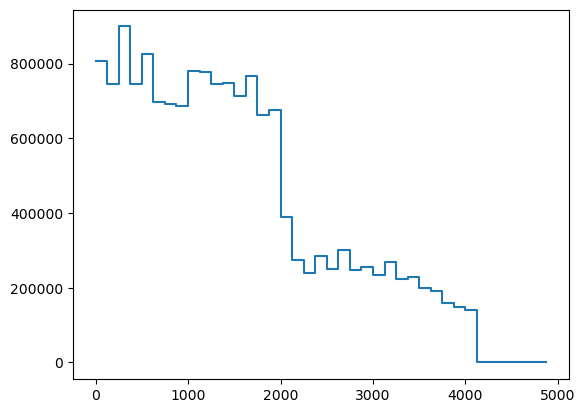

In [3]:
hist1 = bh.Histogram(bh.axis.Regular(40, 0, 5000))
hist1.fill(out.flat)

fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post");